# XGBoost(eXtra Gradient Boost)

## XGBoost 개요
- 트리 기반의 앙상블 학습에서 가장 각광받고 있는 알고리즘 중 하나
- 압도적인 수치의 차이는 아니지만, 분류에 있어서 일반적으로 다른 머신러닝보다 뛰어난 예측 성능을 나타냄
- GBM에 기반하지만, GBM의 단점인 느린 수행 시간 및 과적합 규제 부재 등의 문제 해결
- 특히 병렬 CPU 환경에서 병렬 학습이 가능해 기존 GBM보다 빠르게 학습 완료

### XGBoost 장점
- 뛰어난 예측 성능
- GBM 대비 빠른 수행 시간
- 과적합 규제 
- 가지치기 (pruning)
- 교차 검증 내장
- 결측값 자체 처리

뛰어난 예측 성능
- 일반적으로 분류와 회귀 영역에서 뛰어난 예측 성능 발휘

GBM 대비 빠른 수행 시간
- 일반적인 GBM은 순차적으로 weak learner가 가중치를 증감하는 방식으로 학습하기 때문에 전반적으로 속도가 느림
- XGBoost는 병렬 수행 및 다양한 기능으로 GBM에 비해 빠른 수행 성능 보장
- 다른 머신러닝 알고리즘(예: 랜덤 포레스트)에 비해 빠르다는 의미는 아님

과적합 규제
- 표준 GBM의 경우 과적합 규제 기능이 없으나
- XGBoost는 자체에 과적합 규제 기능 있어서 과적합에 좀 더 강한 내구성이 있음

가지치기 (pruning)
- 일반적으로 GBM은 분할 시 부정 손실이 발생하면 분할을 더 이상 수행하지 않음에도
-  지나치게 많은 분할이 발생할 수 있는데
- max_depth 파라미터로 분할 깊이를 조정하면
- 더 이상 긍정 이득이 없는 분할을 가지치기 해서 분할 수를 줄일 수 있음

결측값 자체 처리
- 결측값 자체 처리 기능 포함

## XGBoost 라이브러리

(1) XGBoost는 처음에는 C/C++로 작성되었음

(2) 파이썬에서도 XGBoost를 구동할 수 있도록 파이썬 패키지 **`xgboost`** 제공
- 패키지 역할 : 대부분 C/C++ 핵심 라이브러리를 호출하는 것
- 사이킷런과 호환되지 않는 독자적인 XGBoost 전용 패키지
- 따라서 사이킷런의 fit(), predict() 메서드 같은 사이킷런 고유 아키텍처 적용 불가
- 다양한 유틸리티(cross_val_score, GridSearchCV, Pipeline 등)도 사용 불가
- **`'파이썬 래퍼 XGBoost 모듈'`**로 지칭

(3) 파이썬 기반의 ML 이용자들이 사이킷런을 많이 사용하기 때문에  
사이킷런과 연동할 수 있는 래퍼 클래스(Wrapper class) 제공
- **`XGBClassifer`** 와 **`XGBRegressor`** 래퍼 클래스
- 사이킷런 estimator가 학습을 위해 사용하는 fit()과 predict() 등 
- 표준 사이킷런 개발 프로세스 및 다양한 유틸리티 활용 가능
- **`'사이킷런 래퍼 XGBoost 모듈'`** 로 지칭

**'파이썬 래퍼 XGBoost 모듈'과 '사이킷런 래퍼 XGBoost 모듈' 차이점**
- '사이킷런 래퍼 XGBoost 모듈' : 사이킷런의 Estimator와 사용법 동일
- '파이썬 래퍼 XGBoost 모듈' : 파이썬 네이티브 XGBoost 고유의 API와 하이퍼파라미터 이용
- 크게 다르지는 않지만 몇 가지 주의할 점이 있음
- 파이썬 Wrapper : 사이킷런 Wrapper
    - eta : learning_rate  (학습률)
    - num_boost_rounds : n_estimators  (학습기의 개수 : 반복 수행 횟수)    

### 하이퍼파라미터 튜닝
- 뛰어난 알고리즘일수록 파라미터 튜닝 필요 적음  
- 파라미터 튜닝에 들이는 공수 대비 성능 향상 효과가 높은 않은 경우가 대부분임


- 파라미터를 튜닝하는 경우는 데이터 세트에 따라 여러 가지 특성이 있음  
    - 피처의 수가 매우 많거나
    - 피처 간 상관되는 정도가 많거나

### 과적합 문제가 심각한 경우 XGBoost에서 하이퍼파라미터 튜닝
- eta 값 낮추고 num_round(또는 n_estimators)는 반대로 높임
- max_depth 값 낮춤
- min_child_weight 값 높임
- gamma 값 높임 (?)
- subsample과 colsample_bytree 조정

### XGBoost 조기 중단(Early Stopping) 기능
- 지정한 수만큼의 부스팅 반복 작업이 종료되지 않더라도 예측 오류가 더 이상 개선되지 않으면 중간에 중지해서 수행 시간 개선 
    - 즉, 오류 감소 효과 없으면 멈춤
    

- 학습 시간 단축 : 특히 최적화 튜닝 단계에서 적절하게 사용 가능


- 반복 횟수를 많이 단축할 경우 예측 성능 최적화가 안 된 상태에서 학습이 종료될 수 있으므로 주의 필요


- 조기 중단 설정을 위한 주요 파라미터
    - early_stoppings : 더 이상 비용 평가 지표가 감소하지 않는 최대 반복 횟수
    - eval_metric : 반복 수행 시 사용하는 비용 평가 지표
    - eval_set : 평가를 수행하는 별도의 검증 데이터 세트.
    
    - 일반적으로 검증 데이터 세트에서 반복적으로 비용 감소 성능 평가

## XGBoost 설치
- Windows 기반에서 설치하는 경우
    * Anaconda Prompt 관리자 모드로 열고  
    * conda install -c anaconda py-xgboost

![image-2.png](attachment:image-2.png)


In [1]:
# XGBoost 버전 확인

import xgboost

print(xgboost.__version__)

0.90


## xgboost : XGBoost의 파이썬 패키지
- 자체적으로 교차 검증, 성능 평가, 피처 중요도 등의 시각화 기능 포함
- 조기 중단 기능 : 수행 시간 개선 
- 빠른 수행시간 처리 가능하지만
- CPU 코어가 많지 않은 개인용 PC에서는 수행시간 향상 효과 보기 어려움

### 파이썬 래퍼 XGBoost 하이퍼파라미터

① 일반 파라미터 : 실행 시 스레드의 개수, silent 모드 등의 선택을 위한 파라미터로 거의 바꾸는 경우 없음

② 부스터 파라미터 : 트리 최적화, 부스팅, regularization 등과 관련된 파라미터

③ 학습 태스크 파라미터 : 학습 수행 시 객체 함수, 평가를 위한 지표 등을 설정하는 파라미터

**① 일반 파라미터**
- booster : gbtree(tree based model) 또는 gblinear(linear model) 선택
    - 디폴트는 gbtree
- silent : 디폴트 0, 출력 메시지를 나타내고 싶지 않을 경우 1로 설정
- nthread : CPU 실행 스레드 개수 조정. 디폴트는 CPU 전체 스레드를 다 사용하는 것
    - 멀티 코어/스레드 CPU 시스템에서 전체 CPU를 사용하지 않고 일부 CPU만 사용해 ML 애플리케이션 구동하는 경우 변경
    
    
**② 부스터 파라미터** 
: 트리 최적화, 부스팅, regularization 등과 관련된 파라미터
- eta [default=0.3, alias: learning_rate] : GBM의 학습률(learning rate)과 같은 파라미터
    - 0 ~ 1 사이의 값을 지정. 부스팅 스텝을 반복적으로 수행할 때 업데이트 되는 학습률 값
    - 파이썬 래퍼 기반의 xgboost를 이용할 경우 디폴트는 0.3
    - 사이킷번 래퍼 클래스 이용시 eta는 learning_rate 파라미터로 대체. 디폴트는 0.1
    - 보통 0.01 ~ 0.2 사이의 값을 선호
    
- num_boost_rounds: GBM의 n_estimators와 같은 파라미터


- **min_child_weight** [default=1] : 트리에서 추가적으로 가지를 나눌지를 결정하기 위해 필요한 데이터들의  Weight 총합.
    - `min_child_weight가 클수록` 분할을 자제함 => **`과적합을 조절`**하기 위해 사용
    
    
- **gamma** [default=0, alias: min_split_loss] : 트리의 리프 노드를 추가적으로 나눌지를 결정할 최소 손실 감소 값
    - 해당 값보다 큰 손실(loss)이 감소된 경우에 리프 노드를 분리함.
    - **`값이 클수록 과적합 감소 효과`**가 있음
    

- **max_depth** [default=6] : 트리 기반 알고리즘의 max_depth와 같음
    - 0을 지정하면 깊이에 제한이 없음
    - `max_depth가 높으면` 특정 피처 조건에 특화되어 룰 조건이 만들어지므로 `과적합 가능성이 높아짐`
    - 보통 3~10 사이의 값 적용
    
    
- sub_sample [default=1] : GBM의 subsample과 동일
    - `트리가 커져서 과적합되는 것을 제어`하기 위해 데이터를 샘플링하는 비율을 지정
    - sub_sample=0.5로 지정하면 전체 데이터의 절반을 트리를 생성하는데 사용
    - 0 ~ 1사이의 값이 가능하나 일반적으로 0.5~1 사이의 값을 사용
    
    
- colsample_bytree [default=1] : GBM의 max_features와 유사
    - 트리 생성에 필요한 피처(컬럼)를 임의로 샘플링할 때 사용
    - 매우 많은 피처가 있는 경우 `과적합을 조정`하는데 적용
    
    
- lambda [default=1, alias: reg_lambda] : L2 Regularization 적용 값
    - 피처 개수가 많을 경우 적용을 검토하며 `값이 클수록 과적합 감소 효과`가 있음
    
    
- alpha [default=0, alias: reg_alpha] : L1 Regularization 적용 값
    - 피처 개수가 많을 경우 적용을 검토하며 `값이 클수록 과적합 감소 효과`가 있음


- scale_pos_weight [default=1] : 특정 값으로 치우친 비대칭한 클래스로 구성된 데이터 세트의 균형을 유지하기 위한 파라미터




**③ 학습 태스크 파라미터**
: 학습 수행 시 객체 함수, 평가를 위한 지표 등을 설정하는 파라미터
- objective : 최소값을 가져야할 손실함수를 정의
    - XGBoost는 다양한 손실함수를 사용하는데, 주로 이진분류인지 다중분류인지에 따라 달라짐
    
        - binary:logistic : 이진분류일 때 사용

    - multi:softmax : 다중 분류일 때 적용
        - 손실함수가 multi:softmax일 경우 레이블 클래스의 개수인 num_class 파라미터를 지정해야 함
           
    - multi:softprob : multi:softmax와 유사하나 개별 레이블 클래스에 해당하는 예측 확률을 반환


- eval_metric : 검증에 사용되는 함수를 정의
    - 기본값은 회귀의 경우 mse, 분류일 경우 error
    - eval_metric 유형
        - mse : Mean Square Error
        - mae : Mean Absolute Error
        - logloss : Nagative log-likelihood
        - error : Binary classification error rate (0.5 threshold)
        - merror : Multiclass classification error rate
        - mlogloss : Multiclass logloss
        - auc : Area under the Curve

### 과적합 문제가 심각할 경우 파이썬래퍼 XGBoost의 조정할 하이퍼 파라미터들
- eta값을 낮춤 (0.01 ~ 0.2) : num_round(또는 n_estimator)는 반대로 높여줘야 함
- max_depth 값을 낮춤
- min_child_weight 값을 높임
- gamma 값을 높임
- subsample과 colsample_bytree 조정

## 사이킷런 래퍼 XGBoost
- 사이킷런의 기본 Estimator를 그대로 상속해 만든 것
- 다른 estimator와 같이 **`fit(), predict()`**만으로 학습과 예측 가능
- GridSearchCV, Pipeline 등 사이킷런의 유틸리티 그대로 사용 가능


- 분류를 위한 XGBClassifier 클래스
- 회귀를 위한 XGBRegressor 클래스


- 파이썬 래퍼 XGBoost에서 사용하는 하이퍼파라미터와 호환성을 유지하기 위해 몇개 하이퍼파라미터를 변경
    - eta  → learning_rate
    - sub_sample → subsample
    - lambda → reg_lambda
    - alpha → reg_alpha
    
    
- xgboost의 n_estimators와 num_boost_round는 동일한 파라미터
    - 이를 동시에 사용할 경우 
        - 파이썬 래퍼 XGBoost API는 n_estimator를 무시하고 num_boost_round를 적용
        - 사이킷런 래퍼 XGBoost는 n_estimator 파라미터를 적용

# [예제] 위스콘신 유방암 예측  
(1) 파이썬 Wrapper XGBoost 적용  
(2) 사이킷런 Wrapper XGBoost 적용

XGBoost를 이용해서  
위스콘신 유방암 데이터 세트에 기반해 종양의 다양한 피처에 따라  
악성 종양인지 일반 양성 종양인지 예측

### 위스콘신 유방암 데이터 세트
: 사이킷런 내장데이터세트 `load_brest_cancer`
- 종양의 크기, 모양 등의 다양한 속성값을 기반으로
- 악성 종양(malignant)인지 양성 종양(benign)인지를 분류한 세트
- 양성 : 제거하여 치유할 수 있는 종양. 성장속도 느리고 전이되지 않음
- 악성 : 암. 빠르게 성장하고 전이되어 생명 위협

## (1) 파이썬 래퍼 XGBoost 적용 – 위스콘신 Breast Cancer 데이터 셋

In [2]:
# 데이터 세트 로딩 

import xgboost as xgb
from xgboost import plot_importance

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
X_features= dataset.data
y_label = dataset.target

In [3]:
# 데이터 확인하기 위해 데이터 프레임으로 생성

cancer_df = pd.DataFrame(data=X_features, columns=dataset.feature_names)

# 맨 마지막에 target 추가
cancer_df['target']= y_label
cancer_df.tail()
# 악성 0, 양성 1

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [4]:
# 레이블 값 분포 확인
print(dataset.target_names)
print(cancer_df['target'].value_counts())

# 악성(malignant) : 0
# 양성(benign) : 1

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


In [5]:
# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출

X_train, X_test, y_train, y_test=train_test_split(X_features, y_label,
                                                  test_size=0.2, random_state=156 )
print(X_train.shape , X_test.shape)

# 학습용 피처 데이터 세트, 테스트용 피처 데이타 세트
# 피처 수는 30

(455, 30) (114, 30)


**학습과 예측 데이터 세트를 `DMatrix`로 변환** 

- 파이썬 래퍼 XGBoost에서는 사이킷런과 다르게 별도로 DMatrix 사용   
- DMatrix : XGBoost 전용 데이터 세트

In [6]:
# 파이썬 xgboost를 사용하려면 DMatrix 타입으로 변환해야 한다
# 학습용, 테스트용 데이터 세트 생성

dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

**하이퍼 파라미터 설정** 

In [7]:
# 주로 딕셔너리 형태로 입력
# objective : 예측하는 결정 함수 설정 (0 또는 1 이진 분류이므로 binary:logistic)
# - (없어도 됨. 판단해서 2진 분류이면 이대로 적용)
# eval_metric : 오류 함수의 평가 성능 지표 
# - 자체적으로 평가하는데, 손실에 대한 것 측정
# logloss : 모델이 예측한 확률 값을 직접적으로 반영하여 평가
# num_rounds : 부스팅 반복 횟수

params = { 'max_depth':3,
           'eta': 0.1,  # learning_rate
           'objective':'binary:logistic', 
           'eval_metric':'logloss'
        }
num_rounds = 400 # 400번 반복


# **지정한 파라미터로 모델 학습**
# - 파이썬 래퍼 XGBoost는 하이퍼 파라미터를 xgboost 모듈의 train() 함수에 파라미터로 전달
# - (사이킷런 : Estimator의 생성자에 파이퍼 파라미터로 전달)

In [8]:
# train 데이터 셋은 'train', evaluation 데이터 셋은 'eval'로 명기

wlist = [(dtrain,'train'),(dtest,'eval')] # eval 평가용

In [9]:
# 하이퍼 파라미터와 early stopping 파라미터를 train( ) 함수의 파라미터로 전달
# early_stoppings 하이퍼 파라미터 사용하지 않고
# early_stopping_rounds 파라미터 사용 
# evals : 이벨류에이션 데이터 세트
# early_stopping_rounds : 조기 중단할 수 있는 최소 반복 횟수(Best 이후)

xgb_model = xgb.train(params = params , dtrain=dtrain , num_boost_round=num_rounds, 
                      early_stopping_rounds=100, evals=wlist )

[0]	train-logloss:0.609688	eval-logloss:0.61352
Multiple eval metrics have been passed: 'eval-logloss' will be used for early stopping.

Will train until eval-logloss hasn't improved in 100 rounds.
[1]	train-logloss:0.540803	eval-logloss:0.547842
[2]	train-logloss:0.483753	eval-logloss:0.494247
[3]	train-logloss:0.434457	eval-logloss:0.447986
[4]	train-logloss:0.39055	eval-logloss:0.409109
[5]	train-logloss:0.354145	eval-logloss:0.374977
[6]	train-logloss:0.321222	eval-logloss:0.345714
[7]	train-logloss:0.292592	eval-logloss:0.320529
[8]	train-logloss:0.267467	eval-logloss:0.29721
[9]	train-logloss:0.245153	eval-logloss:0.277991
[10]	train-logloss:0.225694	eval-logloss:0.260302
[11]	train-logloss:0.207937	eval-logloss:0.246037
[12]	train-logloss:0.192184	eval-logloss:0.231556
[13]	train-logloss:0.177916	eval-logloss:0.22005
[14]	train-logloss:0.165222	eval-logloss:0.208572
[15]	train-logloss:0.153622	eval-logloss:0.199993
[16]	train-logloss:0.14333	eval-logloss:0.190118
[17]	train-logl

**결과**
- train()으로 학습 수행
- 400번 반복하면서 logloss 값이 계속 감속

- 311번 반복까지만 수행한 후 학습 종료
- 211에서 0.085593으로 가장 좋았고 뒤에 더 적은 값 없음
- early_stopping_rounds=100으로 설정했으므로
- 211이후 100번 더 반복 동안 성능 평가 지수가 향상되지 못해서 학습 종료

**테스트 데이터 세트에 예측 수행**

- 파이썬 래퍼 XGBoost는 train() 함수를 호출해서 학습이 완료된 모델 객체 반환
- 이 모델 객체는 예측 수행할 때 predict() 메서드 사용
- predict()를 통해 예측 확률값 반환
- (사이킷런의 predict()는 예측 결과 클래스 값(0, 1) 반환
   - 예측 확률 반환 : predict_proba())

In [10]:
# 예측 수행 : 예측 확률값 반환
pred_probs = xgb_model.predict(dtest)
print('predict( ) 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10],3))

# 예측 확률이 0.5 보다 크면 1 , 그렇지 않으면 0 으로 예측값 결정하여 
# List 객체인 preds에 저장 
preds = [ 1 if x > 0.5 else 0 for x in pred_probs ]
print('예측값 10개만 표시:', preds[:10])

predict( ) 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[0.934 0.003 0.91  0.094 0.993 1.    1.    0.999 0.997 0.   ]
예측값 10개만 표시: [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


결과
결과가 예측 확률값
이진 값일 때 1값에 대한 예측 확률값만 표시

 predict_proba() : 0값과 1값에 대한 예측 확률 반환
[0에 대한 확률값, 1에 대한 확률값]


**앞의 평가에서 생성한 get_clf_eval( ) 함수를 적용해서  
XGBoost 모델의 에측 성능 평가**

In [12]:
# XGBoost 모델의 예측 성능 평가
# 앞에서 작성한 get_clf_eval( ) 함수(복사)

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

# 수정된 get_clf_eval() 함수 
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))


In [13]:
# 테스트 실제 레이블 값을 가지는 y_test와 
# 예측 레이블인 preds 인자 
get_clf_eval(y_test, preds, pred_probs)

오차 행렬
[[35  2]
 [ 1 76]]
정확도: 0.9737, 정밀도: 0.9744, 재현율: 0.9870, F1: 0.9806, AUC:0.9951


### xgboost 패키지에 내장된 시각화 기능 이용하여 피처 중요도 시각화

- plot_importance() API : 피처의 중요도를 막대그래프 형식으로 나타냄
    - 기본 평가 지표로 fi 스코어를 기반으로 해서 
    - 각 피처의 중요도 표시

**`plot_importance(학습이 완료된 모델 객체, Matplotlib의 ax)`**
    
(사이킷런 : Estimator 객체의 feature_importance_ 속성을 이용해 시각화)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

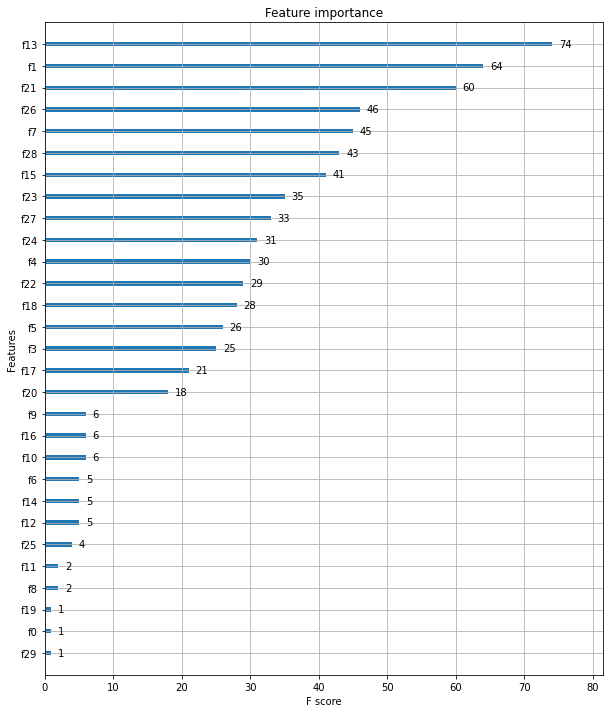

In [15]:
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

fig, ax = plt.subplots(figsize=(10, 12)) # 축 반환
plot_importance(xgb_model, ax=ax) # 학습이 된 xgb_model과 축

# 결과
# 중요도 순으로 나열

**graphviz를 이용하여 XGBoosts 모델 트리 시각화**

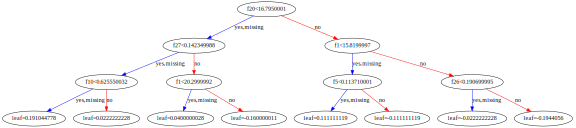

In [16]:
############# 참고

from sklearn.tree import export_graphviz
xgboost.to_graphviz(xgb_model, size="8,8")

### 파이썬 래퍼 XGBoost 교차검증 수행 API : cv()

: xgboost는 사이킷런의 GridSearchCV와 유사하게 cv( )를 API로 제공

In [17]:
xgb.cv(params, dtrain, num_boost_round=10, nfold=3, stratified=False,
        folds=None, metrics=(),obj=None, feval=None, maximize=False,
        early_stopping_rounds=None, fpreproc=None, as_pandas=True,
        verbose_eval=None, show_stdv=True, seed=0, callbacks=None, shuffle=True)

,train-logloss-mean,train-logloss-std,test-logloss-mean,test-logloss-std
0,0.610037,0.000064,0.617448,0.004962
1,0.541817,0.000202,0.555140,0.008989
2,0.483717,0.000955,0.503529,0.012238
3,0.434676,0.001311,0.459869,0.015795
4,0.392310,0.001686,0.423058,0.016789
5,0.355129,0.001390,0.391187,0.019785
6,0.322530,0.001909,0.361120,0.019378
7,0.294159,0.001618,0.337139,0.021085
8,0.269083,0.002068,0.314902,0.019971
9,0.246208,0.001940,0.295012,0.019237


- params(dict): 부스터 파라미터
- dtrain(DMatrix) : 학습 데이터
- num_boost_round(int) : 부스팅 반복횟수
- nfold(int) : CV폴드 개수
- stratified(bool) : CV수행시 샘플을 균등하게 추출할지 여부
- metrics(string or list of strings) : CV 수행시 모니터링할 성능 평가 지표
- early_stopping_rounds(int) : 조기중단을 활성화시킴. 반복횟수 지정


xgv.cv의 반환 값은 데이터프레임 형태

## (2) 사이킷런 Wrapper XGBoost 개요 및 적용 

- 사이킷런의 기본 Estimator를 그대로 상속해서 만들었기 때문에  
- fit()과 predict()만드로 학습과 예측 가능  

- 하이퍼 파라미터 차이  
    - 파이썬 Wrapper : 사이킷런 Wrapper  
        - eta : learning_rate (학습률)  
        - num_boost_rounds : n_estimators (학습기의 개수 : 반복 수행 횟수)  

In [18]:
# 저자 설명
# 원래는 검증 데이터 세트로 해야 하는데
# 데이터 세트가 충분하지 않아서 
# train 데이터에서 검증용 데이터를 추출하기에 너무 적어서
# 테스트 데이터 사용했음
# 이것도 과적합에 해당 : 모의고사 봐야 하는데 본고사 보고 있는 상황
# 예제에서 양해 바람 : 실제 데이터에서는 이렇게 하면 안 됨 (주의)
# 테스트 데이터 세트는 학습 시에는 완전히 알려지지 않은 데이터 세트 사용해야 함

In [19]:
# 사이킷런 래퍼 XGBoost 클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier

evals = [(X_test, y_test)] 

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)

# 학습과 예측 수행 : fit(), predict(), predict_proba() 이용
# fit()에서 early_stopping_rounds 설정
xgb_wrapper.fit(X_train, y_train,  early_stopping_rounds=400,
                eval_set=evals, eval_metric="logloss",  verbose=True)

w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

# 결과
# validation_0-logloss 값이 계속 적어짐
# n_estimator로 설정한 400이 끝나면 종료

[0]	validation_0-logloss:0.61352
Will train until validation_0-logloss hasn't improved in 400 rounds.
[1]	validation_0-logloss:0.547842
[2]	validation_0-logloss:0.494247
[3]	validation_0-logloss:0.447986
[4]	validation_0-logloss:0.409109
[5]	validation_0-logloss:0.374977
[6]	validation_0-logloss:0.345714
[7]	validation_0-logloss:0.320529
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.277991
[10]	validation_0-logloss:0.260302
[11]	validation_0-logloss:0.246037
[12]	validation_0-logloss:0.231556
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.208572
[15]	validation_0-logloss:0.199993
[16]	validation_0-logloss:0.190118
[17]	validation_0-logloss:0.181818
[18]	validation_0-logloss:0.174729
[19]	validation_0-logloss:0.167657
[20]	validation_0-logloss:0.158202
[21]	validation_0-logloss:0.154725
[22]	validation_0-logloss:0.148947
[23]	validation_0-logloss:0.143308
[24]	validation_0-logloss:0.136344
[25]	validation_0-logloss:0.132778
[26]	validation_0-logloss:0.127912

In [20]:
# 예측 성능 평가 수행
# 앞에서 사용한 평가 함수 사용
get_clf_eval(y_test, w_preds, w_pred_proba)

오차 행렬
[[35  2]
 [ 1 76]]
정확도: 0.9737, 정밀도: 0.9744, 재현율: 0.9870, F1: 0.9806, AUC:0.9951


**early stopping을 100으로 설정하고 재 학습/예측/평가**

In [21]:
# early stopping이 어떻게 동작하는지 확인

from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)

evals = [(X_test, y_test)]
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=100, 
                eval_metric="logloss", eval_set=evals, verbose=True)

ws100_preds = xgb_wrapper.predict(X_test)
ws100_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

[0]	validation_0-logloss:0.61352
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.547842
[2]	validation_0-logloss:0.494247
[3]	validation_0-logloss:0.447986
[4]	validation_0-logloss:0.409109
[5]	validation_0-logloss:0.374977
[6]	validation_0-logloss:0.345714
[7]	validation_0-logloss:0.320529
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.277991
[10]	validation_0-logloss:0.260302
[11]	validation_0-logloss:0.246037
[12]	validation_0-logloss:0.231556
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.208572
[15]	validation_0-logloss:0.199993
[16]	validation_0-logloss:0.190118
[17]	validation_0-logloss:0.181818
[18]	validation_0-logloss:0.174729
[19]	validation_0-logloss:0.167657
[20]	validation_0-logloss:0.158202
[21]	validation_0-logloss:0.154725
[22]	validation_0-logloss:0.148947
[23]	validation_0-logloss:0.143308
[24]	validation_0-logloss:0.136344
[25]	validation_0-logloss:0.132778
[26]	validation_0-logloss:0.127912

In [22]:
# 결과
# Will train until validation_0-logloss hasn't improved in 100 rounds.
# 100번 반복하는 동안 validation_0-logloss가 향상되지 않을 때가지 수행
# 향상되지 않으면 중지

# Stopping. Best iteration:
# [211]	validation_0-logloss:0.085593
# [211] 이때가 가장 좋았고 이후 더 좋은 값이 없음 (더 작은 값이 없음)
# early_stopping_rounds=100 했으므로 
# Best 이후 100번 더 수행하고 311번에서 멈춤

In [23]:
# 예측 성능 평가
get_clf_eval(y_test , ws100_preds, ws100_pred_proba)

오차 행렬
[[34  3]
 [ 1 76]]
정확도: 0.9649, 정밀도: 0.9620, 재현율: 0.9870, F1: 0.9744, AUC:0.9954


In [24]:
# 결과
# 조기 중단 적용하지 않는 결과보다 약간 저조한 성능을 나타냈지만
# 큰 차이는 없음
# 정확도: 0.9737, 정밀도: 0.9744, 재현율: 0.9870,    F1: 0.9806, AUC:0.9951
# 정확도: 0.9649, 정밀도: 0.9620, 재현율: 0.9870,    F1: 0.9744, AUC:0.9954

# 그렇다고 조기 중단값을 너무 급격하게 줄이면 
# 예측 성능이 저하될 우려가 큼
# 아직 성능이 향상될 여지가 있는데도 너무 빨리 반복이 멈추면
# 충분한 학습이 되지 않아 예측 성능이 나빠질 수 있음

**early stopping을 10으로 설정하고 재 학습/예측/평가**

In [25]:
# early_stopping_rounds를 10으로 설정하고 재 학습. 
# 수행 시간이 훨씬 더 빨리 끝날 것임
# 이러면 미처 최적화되기 전에 학습을 마치는 문제점이 있기는 한데
# 정말 시간이 짧다 그러면 요정도만 학습을 하고
# 대강 하이퍼 파라미터로 튜닝할 때 자주 사용됨

# 하이퍼 파라미터 튜닝 시 조기 중단 활용 방법
# 하이퍼 파라미터를 다 조합해서 수행하면 시간이 너무 오래 걸리니까
# 그렇게 하지 않고 일단 early_stopping_rounds를 짧게 줘서
# 이 안에서 하이퍼 파라미터가 어떻게 최적화될 것인가를 잡아준 다음에 (baseline을 잡은 다음에)
# 점점 더 early_stopping_rounds를 늘려 간다거나 n_estimator를 늘려감

In [26]:
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=10, 
                eval_metric="logloss", eval_set=evals,verbose=True)

ws10_preds = xgb_wrapper.predict(X_test)
ws10_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]
get_clf_eval(y_test , ws10_preds, ws10_pred_proba)

[0]	validation_0-logloss:0.61352
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.547842
[2]	validation_0-logloss:0.494247
[3]	validation_0-logloss:0.447986
[4]	validation_0-logloss:0.409109
[5]	validation_0-logloss:0.374977
[6]	validation_0-logloss:0.345714
[7]	validation_0-logloss:0.320529
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.277991
[10]	validation_0-logloss:0.260302
[11]	validation_0-logloss:0.246037
[12]	validation_0-logloss:0.231556
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.208572
[15]	validation_0-logloss:0.199993
[16]	validation_0-logloss:0.190118
[17]	validation_0-logloss:0.181818
[18]	validation_0-logloss:0.174729
[19]	validation_0-logloss:0.167657
[20]	validation_0-logloss:0.158202
[21]	validation_0-logloss:0.154725
[22]	validation_0-logloss:0.148947
[23]	validation_0-logloss:0.143308
[24]	validation_0-logloss:0.136344
[25]	validation_0-logloss:0.132778
[26]	validation_0-logloss:0.127912


In [27]:
# 결과
# 62번 반복까지만 수행한 후 학습 종료
# 52에서 0.089577로 가장 좋았고 뒤에 더 적은 값 없음
# 10번의 반복 동안 성능 평가 지수가 향상되지 못해서 학습 종료
# 전체적으로 떨어지는 결과가 나왔음
# 정확도: 0.9561, 정밀도: 0.9615, 재현율: 0.9740,    F1: 0.9677, AUC:0.9947

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

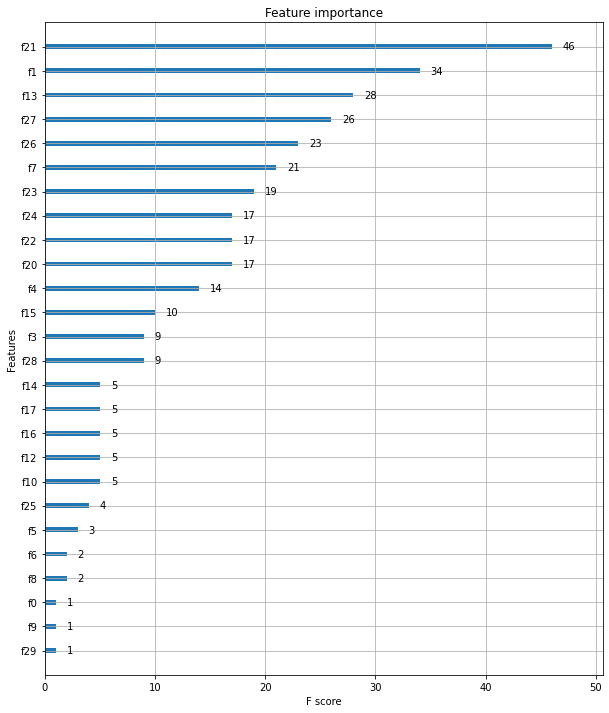

In [28]:
# 피처 중요도 시각화

from xgboost import plot_importance
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

fig, ax = plt.subplots(figsize=(10, 12))
# 사이킷런 래퍼 클래스 입력 
plot_importance(xgb_wrapper, ax=ax)